In [55]:
from source import data_wrangle
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
advanced = data_wrangle.read_all_advanced('./data/advanced')
pergame  = data_wrangle.read_all_pergame('./data/per_game')
seasonal = data_wrangle.clean_and_join_seasonal_dataframe(advanced, pergame)
demographic = data_wrangle.read_demographic_data('./data/player_data.csv')
joined = data_wrangle.add_years_in_league(seasonal, demographic)

In [3]:
joined[joined['Seasons_number']<1]

,Player,Pos,Age,Tm,G,MP_total,PER,TS%,3PAr,FTr,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G,Seasons_number


Text(0.5, 1.0, 'Number of Seasons Played in Data (Adjusted for Rookie Year)')

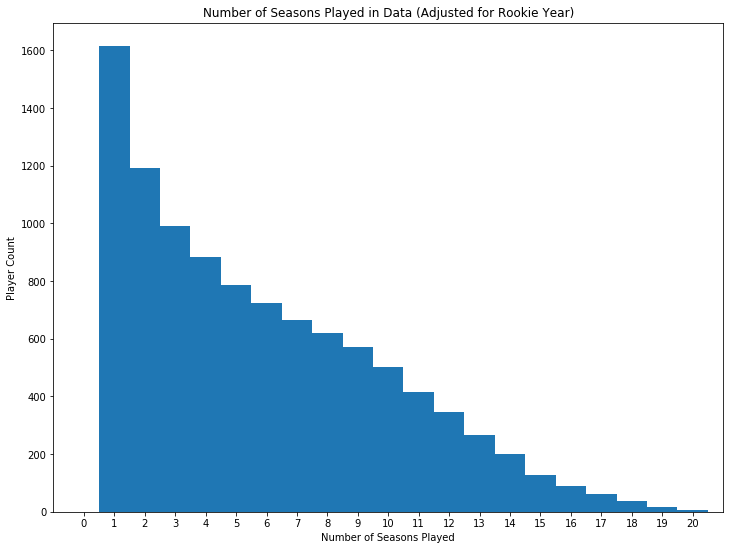

In [17]:
data = joined['Seasons_number']
bins = np.arange(22) - 0.5
plt.figure(figsize=(12,9))
plt.hist(data, bins)
plt.xticks(range(21))
plt.xlim([-1,21])
plt.xlabel('Number of Seasons Played')
plt.ylabel('Player Count')
plt.title('Number of Seasons Played in Data (Adjusted for Rookie Year)')

Let's get rid of the players that played less than 4 years, as we aren't really concerned about predicting them

Text(0.5, 1.0, 'Number of Seasons Played--4 years+ (Adjusted for Rookie Year)')

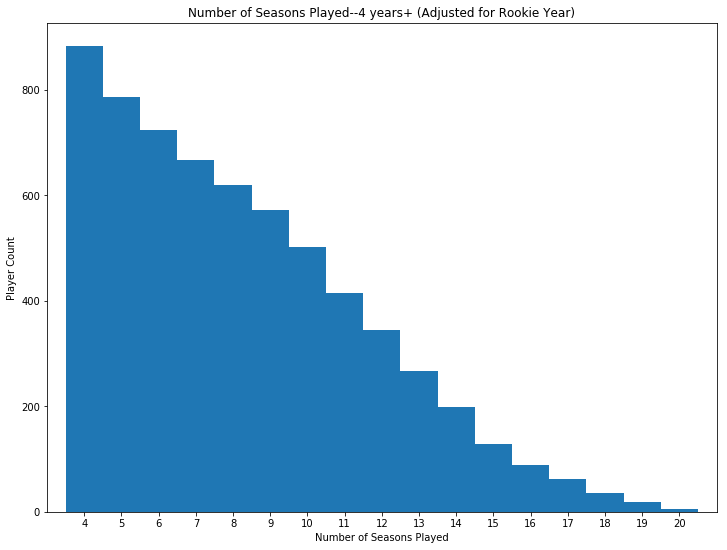

In [45]:
data = joined[joined['Seasons_number']>3]['Seasons_number']
bins = np.arange(22) - 0.5
plt.figure(figsize=(12,9))
plt.hist(data, bins)
plt.xticks(range(4,21))
plt.xlim([3,21])
plt.xlabel('Number of Seasons Played')
plt.ylabel('Player Count')
plt.title('Number of Seasons Played--4 years+ (Adjusted for Rookie Year)')

Plot Average minutes year 4 x-axis, years in league (5-9 in y)

In [5]:
avg_min_year4 = joined.loc[joined['Seasons_number']==4,['Player','MP_pergame']]

In [6]:
#avg_min_year5 = joined.loc[joined['Seasons_number']==5,['Player','MP_pergame']]
#avg_min_year6 = joined.loc[joined['Seasons_number']==6,['Player','MP_pergame']]
#avg_min_year7 = joined.loc[joined['Seasons_number']==7,['Player','MP_pergame']]
#avg_min_year8 = joined.loc[joined['Seasons_number']==8,['Player','MP_pergame']]
#avg_min_year9 = joined.loc[joined['Seasons_number']==9,['Player','MP_pergame']]

In [19]:
max_seasons_played = joined[joined['Seasons_number']>=4].groupby('Player').max()['Seasons_number']

In [20]:
max_seasons_played

Player
A.C. Green              16
A.J. Price               6
Aaron Brooks            11
Aaron Gordon             4
Aaron Gray               7
Aaron McKie             13
Aaron Williams          15
Acie Earl                4
Acie Law                 4
Adam Keefe               9
Adam Morrison            4
Adonal Foyle            12
Adonis Jordan            6
Adreian Payne            4
Adrian Caldwell          9
Adrian Griffin           9
Al Harrington           16
Al Horford              11
Al Jefferson            14
Al Thornton              4
Al-Farouq Aminu          8
Alan Anderson           12
Alan Henderson          12
Alec Burks               7
Aleksandar Radojevic     6
Alex Acker               4
Alex Len                 5
Alexis Ajinca            9
Allan Houston           12
Allen Crabbe             5
                        ..
Walter McCarty          10
Wang Zhizhi              5
Wayman Tisdale          12
Wayne Ellington          9
Wesley Johnson           8
Wesley Matthews      

In [9]:
max(max_seasons_played)

23

In [10]:
mins = avg_min_year4['MP_pergame']

In [21]:
avg_min_year4

,Player,MP_pergame
13,A.J. Price,22.4
19,Aaron Brooks,21.8
29,Aaron Gordon,32.9
33,Aaron Gray,13.0
42,Aaron McKie,22.4
53,Aaron Williams,17.1
66,Acie Earl,10.6
70,Acie Law,14.2
79,Adam Morrison,7.8
83,Adonal Foyle,25.1


In [22]:
type(max_seasons_played)

pandas.core.series.Series

In [24]:
max_frame = max_seasons_played.to_frame()

In [27]:
merged = max_frame.merge(avg_min_year4, left_index=True, right_on='Player')
merged.head()

,Seasons_number,Player,MP_pergame
13,6,A.J. Price,22.4
19,11,Aaron Brooks,21.8
29,4,Aaron Gordon,32.9
33,7,Aaron Gray,13.0
42,13,Aaron McKie,22.4


Text(0, 0.5, 'Number of seasons played in NBA')

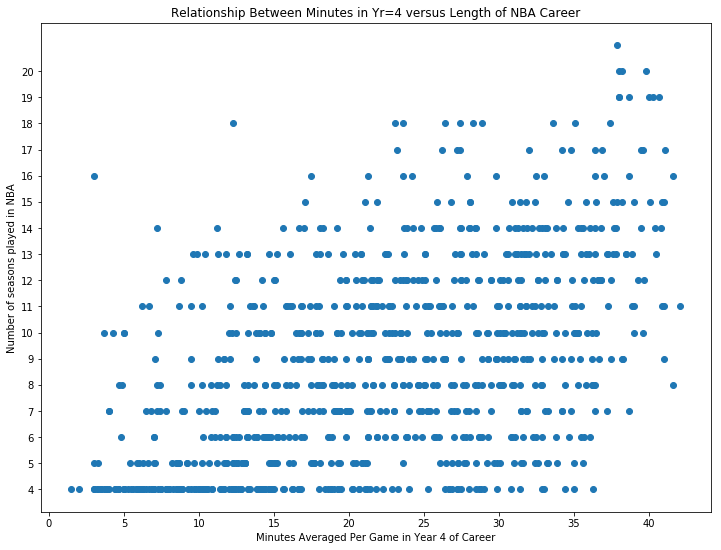

In [39]:
plt.figure(figsize=(12,9))
plt.scatter(merged['MP_pergame'],merged['Seasons_number'])
plt.yticks(range(4,21))
plt.title("Relationship Between Minutes in Yr=4 versus Length of NBA Career")
plt.xlabel('Minutes Averaged Per Game in Year 4 of Career')
plt.ylabel('Number of seasons played in NBA')


Definitely a relationship between the minutes plac

In [36]:
merged[merged['Seasons_number']==16]

,Seasons_number,Player,MP_pergame
112,16,Al Harrington,29.8
514,16,Antawn Jamison,37.0
697,16,Antonio McDyess,38.7
848,16,Ben Wallace,24.2
1496,16,Cedric Henderson,17.5
1621,16,Chris Andersen,21.3
3330,16,Erick Dampier,23.6
4908,16,Joe Smith,33.0
6348,16,Manu Ginobili,27.9
7255,16,Nene Hilario,3.0


For that weird 3-mpg outlier, in 2005–06, Nenê missed 81 games after suffering a torn ACL in his right knee after just three minutes of action against the San Antonio Spurs in the Denver's season opening game on November 1.  Nene is that outlier

## Correlations 

Looking at the Pearson Correlation coefficient for the entire dataset, it unsurprisingly appears that OWS (Offensive Win Shares) and DWS (Defensive Win Shares) are tightly correlated to Win Shares.  Given that WS is calculated from OWS and DWS (as a combination of the two), we should expect a very high correlation.  

Value over Replacement Player (VORP) is also highly correlated with Win Shares. VORP converts the BPM rate into an estimate of each player's overall contribution to the team, measured vs. what a theoretical "replacement player" would provide, where the "replacement player" is defined as a player on minimum salary or not a normal member of a team's rotation.

So, when I look at the correlation between VORP and BPM, I expect to see a high value.

None of the negative columns were that negative, so I'm just going to look at the most positive values first



In [56]:
correlations  = joined.corr()['WS'].reset_index().sort_values('WS',ascending=False).reset_index().drop('level_0',axis=1)

In [68]:
columns = list(correlations['index'][:10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a10d3c8>,
      dtype=object)

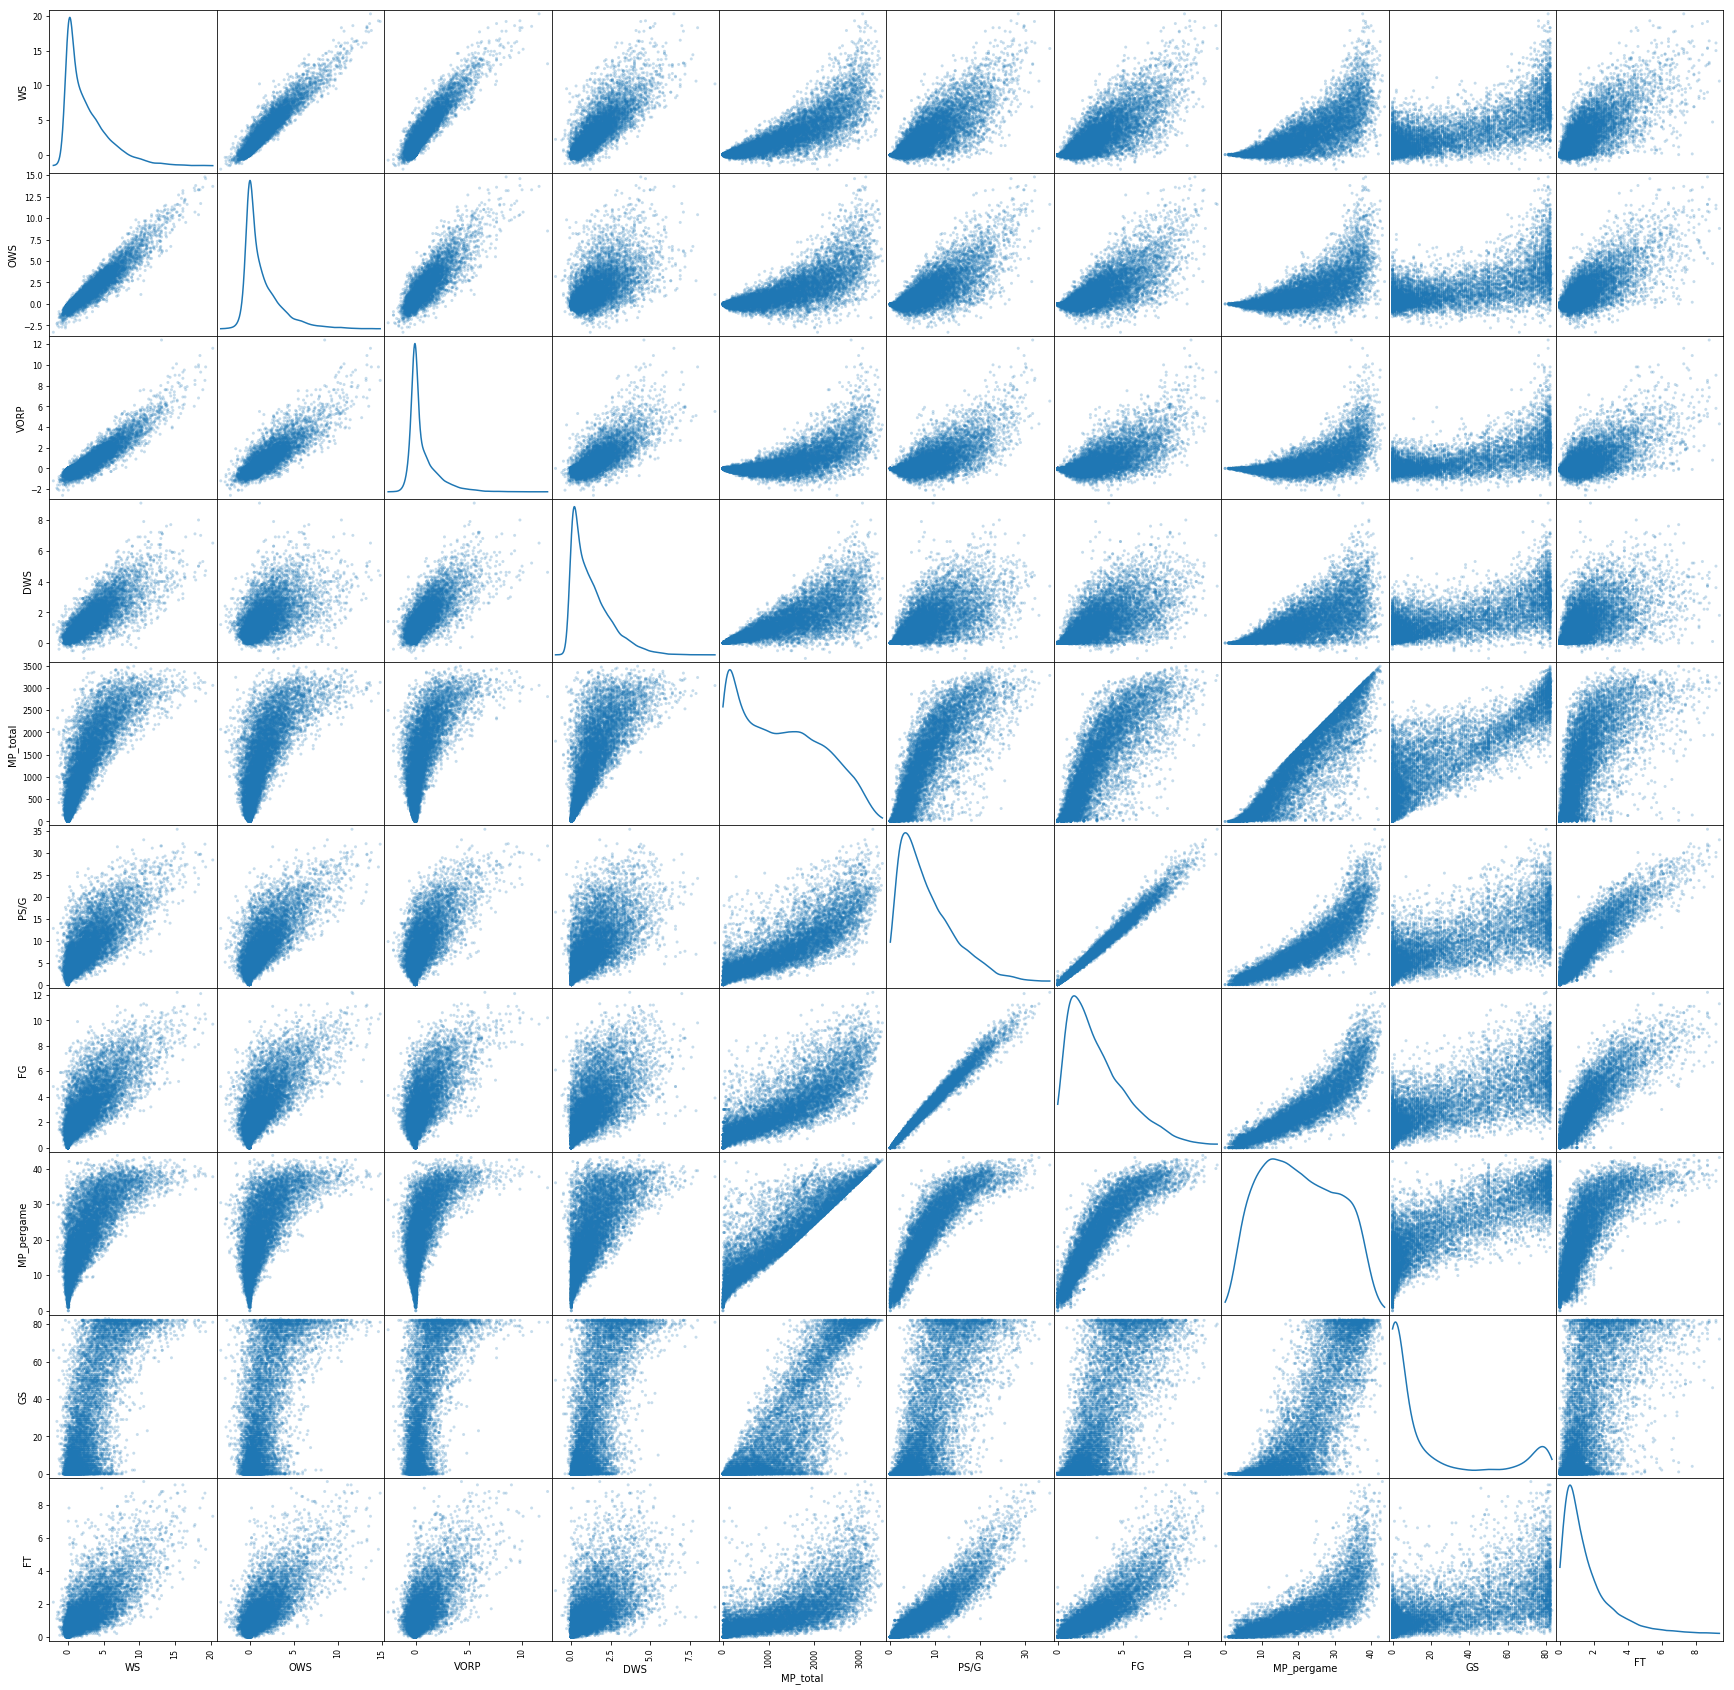

In [69]:
filtered = joined[columns]

scatter_matrix(filtered,alpha=.25, diagonal='kde',figsize=(30,30))